In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import DataReader as wb
from quandl import get as qdl
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('bmh')

,SNC.TO,TD,^BVSP,VALE3.SA,IronOre
count,495.000000,486.000000,473.000000,473.000000,483.000000
mean,40.192366,54.331574,90934.692703,49.069807,77.918634
std,14.047959,2.294633,10664.886218,4.686203,12.592582
min,15.488437,45.834755,69815.000000,38.779011,61.600000
25%,26.015921,53.115732,83118.000000,46.490002,67.590000
50%,45.897449,54.250505,89710.000000,49.660000,74.040000
75%,53.429029,55.958183,99469.000000,52.000000,85.515000
max,59.623077,58.293087,114314.648438,62.200001,112.080000


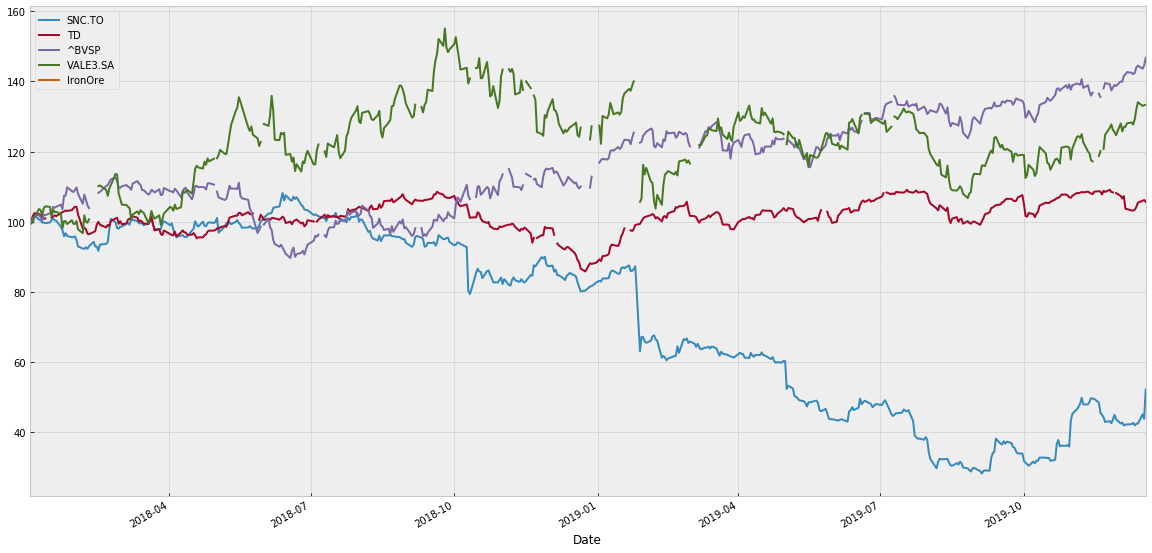

In [2]:
tickers = ['SNC.TO', 'TD', '^BVSP', 'VALE3.SA']
df = pd.DataFrame()
for t in tickers:
    try:
        df[t] = wb(t, data_source='yahoo', start='2018-01-01')['Adj Close']
    except:
        pass

df['IronOre'] = qdl('CHRIS/CME_TIO3-Iron-Ore-62-Fe-CFR-China-TSI-Futures-Continuous-Contract-3-TIO3')['Settle']

(df / df.iloc[0] * 100).plot(figsize=(20,10))
df.describe()

In [3]:
log_returns = np.log(df / df.shift(1))

std_returns = log_returns.std()

var_returns = log_returns.var() * 250 ** 0.5

cov_returns = log_returns.cov() * 250

cor_returns = log_returns.corr()

In [4]:
log_returns.tail()

,SNC.TO,TD,^BVSP,VALE3.SA,IronOre
Date,,,,,
2019-12-12,0.011641,0.007573,0.011077,0.021379,-0.002193
2019-12-13,0.000429,0.011786,0.003248,0.015182,0.003944
2019-12-16,0.060272,0.004958,-0.005961,-0.007843,-0.003615
2019-12-17,-0.027399,0.002294,0.006414,0.001499,-0.005281
2019-12-18,0.173856,-0.005301,0.014971,0.000936,NaN


In [5]:
std_returns * 100

SNC.TO      2.942911
TD          0.852429
^BVSP       1.276996
VALE3.SA    1.993262
IronOre     1.889762
dtype: float64

In [6]:
var_returns * 100

SNC.TO      1.369381
TD          0.114891
^BVSP       0.257839
VALE3.SA    0.628202
IronOre     0.564656
dtype: float64

In [7]:
cov_returns

,SNC.TO,TD,^BVSP,VALE3.SA,IronOre
SNC.TO,0.216518,0.013400,0.011702,0.018288,0.000037
TD,0.013400,0.018166,0.010986,0.016877,0.001638
^BVSP,0.011702,0.010986,0.040768,0.030730,0.000366
VALE3.SA,0.018288,0.016877,0.030730,0.099327,0.024177
IronOre,0.000037,0.001638,0.000366,0.024177,0.089280


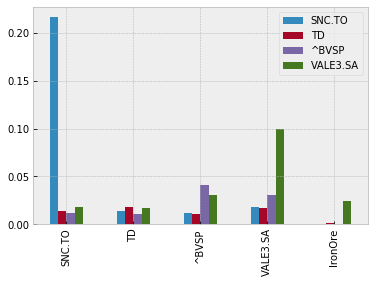

In [8]:
cov_returns[tickers].plot(kind='bar')

In [9]:
cor_returns

,SNC.TO,TD,^BVSP,VALE3.SA,IronOre
SNC.TO,1.000000,0.210764,0.144206,0.144380,0.000272
TD,0.210764,1.000000,0.407790,0.403167,0.040632
^BVSP,0.144206,0.407790,1.000000,0.482916,0.006078
VALE3.SA,0.144380,0.403167,0.482916,1.000000,0.259444
IronOre,0.000272,0.040632,0.006078,0.259444,1.000000


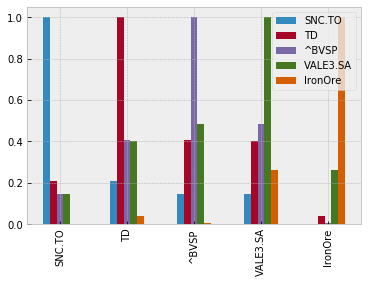

In [10]:
cor_returns.plot(kind='bar')

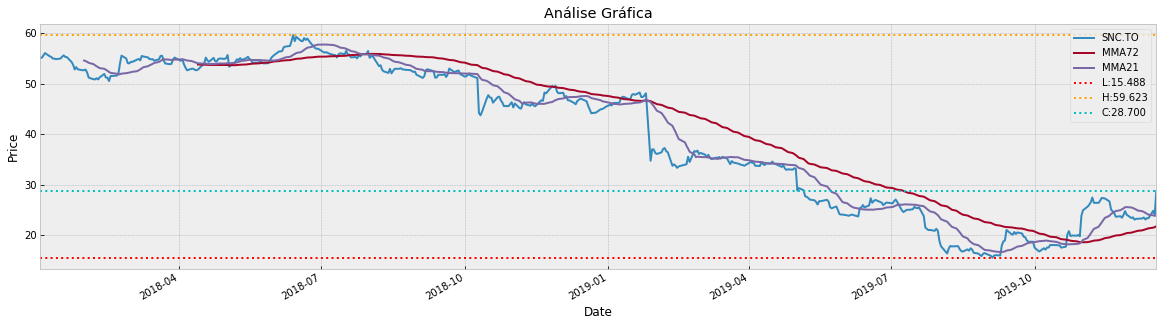

In [11]:
df[tickers[0]].plot(figsize=(20,5))
df[tickers[0]].rolling(72).mean().plot(label='MMA72')
df[tickers[0]].rolling(21).mean().plot(label='MMA21')

plt.axhline(df[tickers[0]].min(), color='r', linestyle=':', label=f'L:{df[tickers[0]].min():0.3f}')
plt.axhline(df[tickers[0]].max(), color='orange', linestyle=':', label=f'H:{df[tickers[0]].max():0.3f}')
plt.axhline(df[tickers[0]].iloc[-1], color='c', linestyle=':', label=f'C:{df[tickers[0]].iloc[-1]:0.3f}')

plt.title('Análise Gráfica')

plt.ylabel('Price')

plt.legend()

plt.show()